<a href="https://colab.research.google.com/github/ShawnLiu119/Spam-Filter-Based-on-Naive-Bayes/blob/master/spamfilter_naivebayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!git clone https://github.com/ShawnLiu119/spam-filter-naivebayes.git

Cloning into 'spam-filter-naivebayes'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

In [10]:
!cd /content/spam-filter-naivebayes

In [13]:
!ls

README.md  spam.csv


In [31]:
df = pd.read_csv('spam.csv', encoding='latin-1')
#Latin-1 (or more formally, ISO-8859-1) is a character encoding standard. It defines a set of characters used for major western European languages.
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


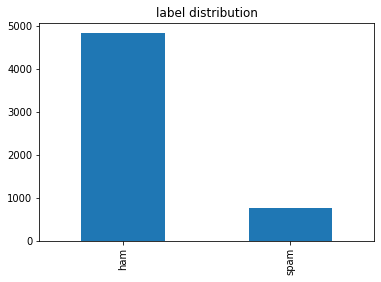

In [32]:
df['v1'].value_counts().plot(kind='bar')
plt.title('label distribution')
plt.show()

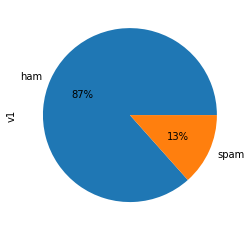

In [33]:
df['v1'].value_counts().plot(kind='pie', autopct='%1.0f%%') 

####Text Minning and Feature Engineering

In [37]:
df_raw = df.dropna(axis=1).rename(columns={'v1': 'category', 'v2': 'text'})

In [38]:
df_raw.head()

,category,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [41]:
df_raw['y'] = df_raw['category'].apply(lambda x: 1 if x == 'spam' else 0)
df_raw['y'].value_counts()

0    4825
1     747
Name: y, dtype: int64

In [42]:
#train test split
from sklearn.model_selection import train_test_split

x = df_raw['text']
y = df_raw['y']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

TF-IDF is better than Count Vectorizers because it not only focuses on the frequency of words present in the corpus but also provides the importance of the words. We can then remove the words that are less important for analysis, hence making the model building less complex by reducing the input dimensions.

#####CountVectorizer

In [106]:
# here we will test out both TFIDF and CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer
#ngram_rangetuple (min_n, max_n), default=(1, 1), default analzer is 'word', 

corpus_train = x_train.to_numpy()
corpus_test = x_test.to_numpy()

#unigram
vect_uni = CountVectorizer(min_df=50) #min_df, if words appear infrequently (less than 50 times), removing terms
train_uni = vect_uni.fit_transform(corpus_train).toarray()
test_uni = vect_uni.transform(corpus_test).toarray()

#bigram
vect_bi = CountVectorizer(analyzer='word', ngram_range=(2,2), min_df=10)
train_bi = vect_bi.fit_transform(corpus_train).toarray()
test_bi = vect_bi.transform(corpus_test).toarray()

x_train_vec = np.concatenate((train_uni, train_bi), axis = 1)
x_test_vec = np.concatenate((test_uni, test_bi), axis = 1)

In [119]:
np.unique(x_train_vec)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 12, 18])

In [108]:
print(x_train_vec.shape)
print(x_test_vec.shape) 
print(y_train.shape)  
print(y_test.shape)  

(4179, 574)
(1393, 574)
(4179,)
(1393,)


In [109]:
#model trainging using NB

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

nb = MultinomialNB()
nb.fit(x_train_vec, y_train)  
y_pred = nb.predict(x_test_vec)

print(f'Accuracy: {round(accuracy_score(y_test,y_pred),3)}\n')
print(classification_report(y_test,y_pred))

# from sklearn.model_selection import GridSearchCV

# parameters = {"alpha": [0.2,1,2,5,10], "fit_prior": [True, False]}
#alpha: Additive (Laplace/Lidstone) smoothing parameter (0 for no smoothing).
#fit_prior: Whether to learn class prior probabilities or not. If false, a uniform prior will be used.

Accuracy: 0.966

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1193
           1       0.89      0.87      0.88       200

    accuracy                           0.97      1393
   macro avg       0.94      0.93      0.93      1393
weighted avg       0.97      0.97      0.97      1393



#####TFIDF Vectorizer

In [110]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfvc = TfidfVectorizer()

corpus_train = x_train.to_numpy()
corpus_test = x_test.to_numpy()

#unigram
vect_uni = TfidfVectorizer(min_df=50) #min_df, if words appear infrequently (less than 50 times), removing terms
train_uni = vect_uni.fit_transform(corpus_train).toarray()
test_uni = vect_uni.transform(corpus_test).toarray()

#bigram
vect_bi = TfidfVectorizer(analyzer='word', ngram_range=(2,2), min_df=10)
train_bi = vect_bi.fit_transform(corpus_train).toarray()
test_bi = vect_bi.transform(corpus_test).toarray()

x_train_tfidf = np.concatenate((train_uni, train_bi), axis = 1)
x_test_tfidf = np.concatenate((test_uni, test_bi), axis = 1)


In [111]:
print(x_train_tfidf.shape)
print(x_test_tfidf.shape) 
print(y_train.shape)  
print(y_test.shape)  

(4179, 574)
(1393, 574)
(4179,)
(1393,)


In [112]:
nb_tf = MultinomialNB()
nb_tf.fit(x_train_tfidf, y_train)  
y_pred_tf = nb.predict(x_test_tfidf)

print(f'Accuracy: {round(accuracy_score(y_test,y_pred_tf),3)}\n')
print(classification_report(y_test,y_pred_tf))

Accuracy: 0.961

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1193
           1       0.91      0.81      0.86       200

    accuracy                           0.96      1393
   macro avg       0.94      0.90      0.92      1393
weighted avg       0.96      0.96      0.96      1393



In [ ]:
#Observation

#For class 1, model (TFIDF) has higher precision but lower recall than model (CountVecter); 
#meaning that TFIDF model intend to miss spam email more easily, or less likely to reject the null hypothesis (ham)

#why? 
# There are a few possibilities. First, there is some variability in performance. 
# It could have been only by chance that countvectorizer performed better than tf-idf. 
# Did you use cross validation (with how many folds)? 
# Is the superior performance of the countvectorizer reliable? 
# I would compare performance across folds to make sure countvectorizer consistently performs better.

# # Second, if you find that countvectorizer reliably outperforms tf-idf on your dataset, 
# then I would dig deeper into the words that are driving this effect. 
# It may be that common words (words which will appear in multiple documents) are helpful in distinguishing between classes. 
# There is substantial research that shows that use of some function words (e.g. first person singular pronouns, “I”) change depending on someone’s psychological state. 
# Function words like pronouns are very common and would be down weighted in tf-idf, but given equal weight to rare words in countvectorizer. 
# I’m not suggesting that first person singular pronouns in particular are driving your results, but it’s worth looking at what words are driving the effect. 
# I would examine which words are important in both types of models, countvectorizer and tf-idf, and then think about whether the words that are most important for the countvectorizer make sense in the context of your text documents and labels. Also, are you removing stop words? 
# You could also see how the models perform with and without stop words, which would be another way to test whether frequent words are actually helping you to distinguish between classes.

Build Bayes from scratch


1.   p-words function generate the features, which represents the probability of each word appearing in either spam or ham
2.   Naive_bayes function goes through every email, and calculate log probability, using += to calculate the P(x1x2x3...xn spam/ham), x1,x2,x3 are words features in test data of emails, if p(x, spam) > p(x, ham), then p(x, spam) / (p(x, spam) + p(x, ham)) > 0.5, then classified as positive 1

The reason using log probability is because when you start multiplying them together, the overall product starts approaching zero.
This is exacerbated by each new feature that is added: with 1,000 features, multiplying 1,000
probabilities together quickly results in an extremely tiny number, one which often cannot be
represented in a double or long double. This issue is not limited to C++; every language
which uses a standard floating-point data type with a fixed number of bits will eventually
run out of precision with extremely tiny numbers.

A common work-around for this situation is to represent probabilities as log-probabilities
instead. 



In [82]:
uni_vocabulary = vect_uni.get_feature_names_out()
counts_uni = c_uni.toarray()

bi_vocabulary = vect_bi.get_feature_names_out()
counts_bi = c_bi.toarray()

In [97]:
x_train_uni = pd.DataFrame()  #panda series can not use drop() column, since there is no column name in pd.series
x_train_bi = pd.DataFrame()


for i in range(len(uni_vocabulary)):
    x_train_uni[uni_vocabulary[i]] = counts_uni[:,i] 

for j in range(len(bi_vocabulary)):
    x_train_bi[bi_vocabulary[j]] = counts_bi[:,j]

In [99]:
#https://www.kaggle.com/code/misbahbilgili/spam-filter-using-naive-bayes-from-scratch

In [ ]:
def P_words(spam,ham,vocabulary):
    
    dict_prob = {} #For each word in vocabulary consist P(word|spam) and P(word|ham)
    for word in vocabulary:
        #P(word|spam) = [num(word,spam) + @] / [num(spam) + @*len(vocabulary)]
        #P(word|ham) = [num(word,ham) + @]/ [num(ham) + @*len(vocabulary)]
        ##num(X) --> number of occurences of X. We chose @ = 1.
        p_word_given_spam = (len(spam[spam[word] != 0])+1)/(len(spam)+len(vocabulary))
        p_word_given_ham = (len(ham[ham[word] != 0])+1)/(len(ham)+len(vocabulary))
        
        dict_prob[word] = {'spam': p_word_given_spam, 'ham': p_word_given_ham}

    return dict_prob

In [ ]:
def Naive_Bayes(X_train,y_train,X_test,vocabulary,unigram):
    
    training_set = X_train.copy()
    training_set['spam'] = y_train #Adding the label to training set.

    spam = training_set[training_set['spam'] == 1] #All mails in training set that are spam
    ham = training_set[training_set['spam'] == 0]  #All mails in training set that are ham

    dict_prob = P_words(spam,ham,vocabulary)

    P_spam = len(spam)/len(training_set)#P(spam)
    P_ham = len(ham)/len(training_set)#P(ham)  
    
    #Vectorizing the test set
    corpus = X_test['text'].to_numpy()
    if(unigram):
        vectorizer_test = CountVectorizer(min_df = 20)
    else:
        vectorizer_test = CountVectorizer(analyzer='word', ngram_range=(2, 2), min_df = 20)
        
    C_test = vectorizer_test.fit_transform(corpus)    
    
    test_set = C_test.toarray() #Counts of words in test_vocab for each mail
    test_vocab = vectorizer_test.get_feature_names() #Vocabulary of test set
    
    results = list() 
    for row in test_set: #For each mail
        P_spamWord = math.log(P_spam)
        P_hamWord = math.log(P_ham)
        for w_index in range(len(row)):
            if(row[w_index] != 0): #If word exists in the mail
                word = test_vocab[w_index]
                if(word in dict_prob): #If this word is also in training vocabulary
                    P_spamWord += math.log(dict_prob[word]['spam'])
                    P_hamWord += math.log(dict_prob[word]['ham'])
                else:
                    continue  #Ignoring the words we have not seen.
            else:
                continue
        if(P_spamWord>P_hamWord):
            results.append(1) #Spam
        else:
            results.append(0) #Ham
            
    return results